## Need to align stimulus with recorded response using the mark track

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [87]:
from helpers import *
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, decimate
from math import floor, ceil

In [13]:
# Load in nwb file
io = NWBHDF5IO('R32_B8.nwb')
nwbfile = io.read()

In [5]:
dmr = loadmat(r'C:\Users\Ankit\Dropbox\AK & KB\DynRip.cchspct.6oct.100hz.mat')

In [8]:
dmr['spct'].shape

(100, 89934)

In [10]:
x = loadmat('full_grid_baseline_zscored.mat')
e105 = x['data'][:, 104]

In [23]:
# This one is not downsampled
e105 = get_gamma_from_grid([104], False, 'baseline', False)

In [14]:
mark = np.array(nwbfile.stimulus['recorded_mark'].data[:])

In [90]:
mark_ds = decimate(mark.flatten(), 4)

c:\users\ankit\miniconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
c:\users\ankit\miniconda3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [94]:
start_index = np.min(np.argwhere(mark_ds > 0.1))

3768

In [58]:
dmr_nwb = np.array(nwbfile.stimulus['recorded_stim'].data[:])

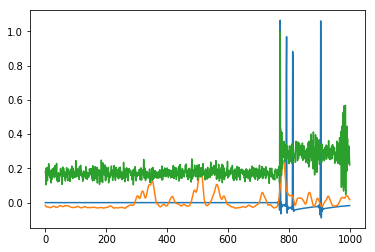

In [60]:
plt.plot(mark[3000:4000])
plt.plot(e105[3000:4000]/max(e105))
plt.plot(dmr_nwb[3000:4000]/max(dmr_nwb))

In [93]:
# Where is the first TTL peak
start_index2 = np.min(np.argwhere(mark.flatten() > 0.1))
start_index2

3770

In [86]:
end_index = np.max(np.argwhere(mark.flatten() > 0.1))
end_index
(start_index - end_index)/4

-89934.75

#### DMR spectrogram provided by Kris does not seem to match up with the collected data set, so instead try and calculate ourselves

In [65]:
from scipy.signal import spectrogram

In [71]:
[f, t, sxx] = spectrogram(dmr_nwb.flatten(), fs=400)

In [73]:
sxx.shape

(129, 1691)

In [74]:
from scipy.io import loadmat, savemat
savemat('dmr_nwb.mat', dict([('dmr', dmr_nwb)]))

In [77]:
x = get_gamma_from_grid([104], True, 'moving', True, 'e105_movingzscore.mat')

c:\users\ankit\miniconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
c:\users\ankit\miniconda3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


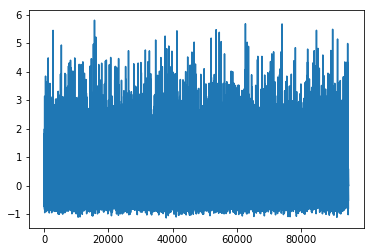

In [78]:
plt.plot(x)

In [98]:
x = np.arange(99)

In [100]:
np.mean(x.reshape(-1, 3), axis = 1)

array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31., 34., 37.,
       40., 43., 46., 49., 52., 55., 58., 61., 64., 67., 70., 73., 76.,
       79., 82., 85., 88., 91., 94., 97.])

In [103]:
dmr['spct'].shape

(100, 89934)

42